Loading in data

In [1]:
import pandas as pd
import numpy as np

artDF = pd.read_csv('dataUsed/articleInfo.csv')
authDF = pd.read_csv('dataUsed/authorInfo.csv')

df = pd.merge(artDF, authDF, on='Article No.', how='outer')
for (column,data) in df.iteritems():
   df[column] = df[column].fillna(0)  


Yearly publications, citations and publications across countires

Text(0, 0.5, '# of Publications')

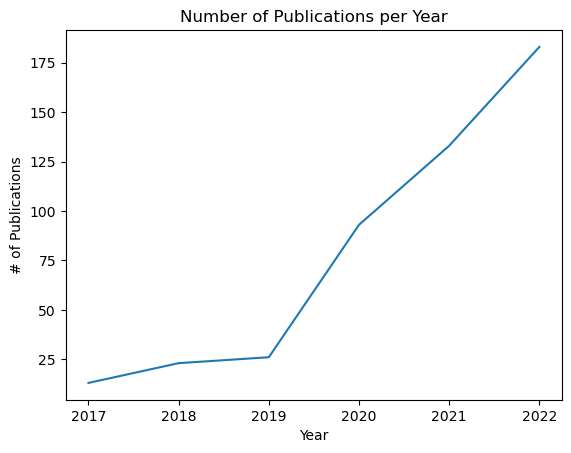

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt


#yearly_publication fig

year = df['Year'].sort_values()
# need to count how many times each value is present
allYears = year.unique()

year_range = year.max() - year.min()

publications = []

for x in range(year_range + 1):
    temp = (year == allYears[x]).sum()
    publications.append(temp)

plt.plot(allYears, publications)
plt.title('Number of Publications per Year')
plt.xlabel('Year')
plt.ylabel('# of Publications')



Text(0, 0.5, '# of Citations')

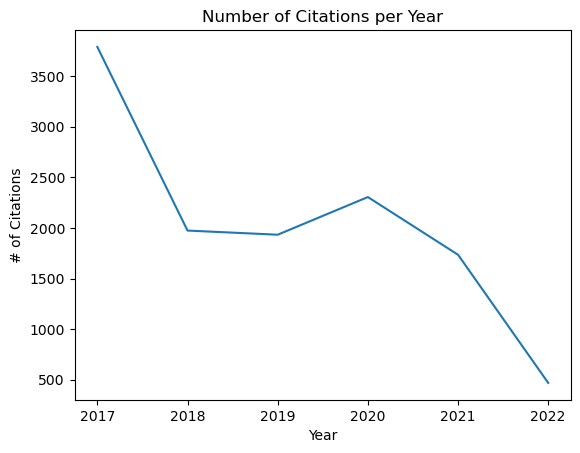

In [29]:
#yearly_citation fig
citations = df[['Year','Citation']].sort_values('Year')

citations_per_year = []
for x in range(year_range + 1):
    citations_per_year.append( 
        citations.loc[citations['Year'] == allYears[x], 'Citation'].sum()
    )


plt.plot(allYears, citations_per_year)
plt.title('Number of Citations per Year')
plt.xlabel('Year')
plt.ylabel('# of Citations')


In [ ]:
import geopandas as gpd
import seaborn as sea

#plotting publications around the world
